In [1]:
import random
import time
import matplotlib.pyplot as plt
import copy
import sys

In [2]:
sys.setrecursionlimit(10000)

# Fonctions Utiles

Les deux fonctions données plus bas sont utiles pour tester si un tableau ou un ensemble de tableaux sont bien
triés par ordre ascendant.


In [4]:
def isSorted(l):
    for i in range(len(l) - 1):
        if l[i] > l[i + 1]: return False
    return True


def areSorted(ll):
    for i in range(len(ll)):
        if not isSorted(ll[i]): return (False, i)
    return (True, 0)



# Création des tableaux

La fonction __create\_data__ permet de créer des listes qui contiennent les tableaux à trier avec des tailles
croissantes. Les paramètres par défaut sont 15 tableaux, et des tailles de tableaux qui augmentent  par incrément de 200. Par défaut, le plus petit tableau aura 200 éléments, le plus grand aura 3000 éléments.

In [5]:
def create_data(nlist=15, nval=200):
    
    # Création de listes de taille incrémentale et de contenu aléatoire
    listDataRandom = []
    listDataSorted = []
    listDataInversedSorted = []
    sizeArrays = []
    
    # Remplissage des listes
    for i in range(1, nlist + 1):
        s = nval * i 
        dataRandom = s*[0]
        dataSorted = s*[0]
        dataInversed = s*[0]
        for j in range(s):
            dataRandom[j]=j
            dataSorted[j]=j
            dataInversed[j]=j
            
        dataInversed.reverse()
        random.shuffle(dataRandom)
        
        listDataRandom.append(dataRandom)
        listDataSorted.append(dataSorted)
        listDataInversedSorted.append(dataInversed)
        sizeArrays.append(s)

    return(sizeArrays, listDataRandom, listDataSorted, listDataInversedSorted)


# Tri des tableaux

La fonction **executerTri** prend en entrée :

- la fonction qui va effectuer le tri **fct_tri**
- la couleur des tracés **color**
- le nom de l'algorithme de tri **nom**
- le nombre de tableaux **nlist** (utilisé par **create_data**)
- le nombre de valeurs dans le premier tableau **nval**  (utilisé par **create_data**)
- un booléen qui indique si le tableau est trié **surplace** ou si le tableau trié est renvoyé comme résultat de la fonction de tri



In [6]:
def executerTri(fct_tri, color, nom, nlist=15, nval=200, surplace = True):
    
    axis, listDataRandom, listDataSorted, listDataInvertedSorted = create_data(nlist, nval)
    
    toplotRandom = []
    toplotSorted = []
    toplotInverted = []
    
    dataTestRandom    = copy.deepcopy(listDataRandom)
    dataTestSorted    = copy.deepcopy(listDataSorted)
    dataTestInverted  = copy.deepcopy(listDataInvertedSorted)
    
    for i in range(len(axis)):
        time1 = time.time()
        if surplace:
            fct_tri(dataTestRandom[i])
        else:
            dataTestRandom[i] = fct_tri(dataTestRandom[i])
        time2 = time.time()
        toplotRandom.append(time2 - time1)
        time3 = time.time()
        if surplace:
            fct_tri(dataTestSorted[i])
        else:
            dataTestSorted[i] = fct_tri(dataTestSorted[i])
        time4 = time.time()
        toplotSorted.append(time4 - time3)
        time5 = time.time()
        if surplace:
            fct_tri(dataTestInverted[i])
        else:
            dataTestInverted[i] = fct_tri(dataTestInverted[i])
        time6 = time.time()
        toplotInverted.append(time6 - time5)


    (ok1, ipb1) = areSorted(dataTestRandom)
    (ok2, ipb2) = areSorted(dataTestSorted)
    (ok3, ipb3) = areSorted(dataTestInverted)
    
    

    if not ok1:
        print(nom + ' data random incorrect, liste #' + str(ipb1))
    else:
        plt.plot(axis, toplotRandom, '-' + color, label=nom + ' (random)')
    if not ok2:
        print(nom + ' data Sorted incorrect, liste #' + str(ipb2))
    else:
        plt.plot(axis, toplotSorted, '--' + color, label=nom + ' (Sorted)')

    if not ok3:
        print(nom + ' data Inverted incorrect, liste #' + str(ipb3))
    else:
        plt.plot(axis, toplotInverted, ':' + color, label=nom + ' (Inverted)')
        plt.legend()



def executerTrirandom(fct_tri, color, nom, nlist=15, nval=200, surplace = True):
    
    axis, listDataRandom, listDataSorted, listDataInvertedSorted = create_data(nlist, nval)
    toplotRandom = []    
    dataTestRandom    = copy.deepcopy(listDataRandom)

    
    for i in range(len(axis)):
        time1 = time.time()
        if surplace:
            fct_tri(dataTestRandom[i])
        else:
            dataTestRandom[i] = fct_tri(dataTestRandom[i])
        time2 = time.time()
        toplotRandom.append(time2 - time1)
    


    (ok1, ipb1) = areSorted(dataTestRandom)

    if not ok1:
        print(nom + ' data random incorrect, liste #' + str(ipb1))
    else:
        plt.plot(axis, toplotRandom, '-' + color, label=nom + ' (random)')
    plt.legend()



def executerTriSorted(fct_tri, color, nom, nlist=15, nval=200, surplace = True):
    
    axis, listDataRandom, listDataSorted, listDataInvertedSorted = create_data(nlist, nval)
    
    toplotSorted = []
  

    dataTestSorted    = copy.deepcopy(listDataSorted)

    for i in range(len(axis)):
        time3 = time.time()
        if surplace:
            fct_tri(dataTestSorted[i])
        else:
            dataTestSorted[i] = fct_tri(dataTestSorted[i])
        time4 = time.time()
        toplotSorted.append(time4 - time3)
        
       
    (ok2, ipb2) = areSorted(dataTestSorted)

    
    if not ok2:
        print(nom + ' data Sorted incorrect, liste #' + str(ipb2))
    else:
        plt.plot(axis, toplotSorted, '--' + color, label=nom + ' (Sorted)')




def executerTriInvertedSorted(fct_tri, color, nom, nlist=15, nval=200, surplace = True):
    
    axis, listDataRandom, listDataSorted, listDataInvertedSorted = create_data(nlist, nval)
    
    toplotInverted = []

    dataTestInverted  = copy.deepcopy(listDataInvertedSorted)
    
    for i in range(len(axis)):
    
        time5 = time.time()
        if surplace:
            fct_tri(dataTestInverted[i])
        else:
            dataTestInverted[i] = fct_tri(dataTestInverted[i])
        time6 = time.time()
        toplotInverted.append(time6 - time5)
    (ok3, ipb3) = areSorted(dataTestInverted)

    if not ok3:
        print(nom + ' data Inverted incorrect, liste #' + str(ipb3))
    else:
        plt.plot(axis, toplotInverted, ':' + color, label=nom + ' (Inverted)')
        plt.legend()

***
---
# Algorithme de tri

l'algorithme **bubble_sort** est donné en exemple

In [7]:
def bubble_sort_exemple(A):
    n = len(A)
    flag = 1
    for i in range(n-1):
        flag = 0
        for j in range(n-1-i):
            if A[j]>A[j+1]:            
                t = A[j]
                A[j]=A[j+1]
                A[j+1] = t
                flag = 1
        if flag == 0:
            break
    return A

<u>Bubble sort :</u>

In [8]:
def bubble_sort(A):
    n = len(A)
    while True:
        swapped = False
        for i in range(1, n):
            if A[i-1] > A[i]:  
                A[i-1], A[i] = A[i], A[i-1]  
                swapped = True
        if not swapped:
            break
    return A


<u>Optimized bubble sort :</u>

In [9]:
def optimized_bubble_sort(A):
    n = len(A)
    while True:
        swapped = False
        for i in range(1, n):
            if A[i - 1] > A[i]:  
                A[i - 1], A[i] = A[i], A[i - 1]  
                swapped = True
        n = n-1 
        if not swapped:  
            break
    return A 

In [10]:
def doubly_optimized_bubble_sort(A):
    n = len(A)
    while n > 1:
        newn = 0
        for i in range(1, n):
            if A[i - 1] > A[i]:
                A[i - 1], A[i] = A[i], A[i - 1]
                newn = i
        n = newn



<u>Selection sort :</u>

In [11]:
def selection_sort(A):
    n = len(A)
    for i in range(n):
        jmin = i
        for j in range(i+1, n):
            if A[j] < A[jmin]:
                jmin = j
        if jmin != i:
            A[i], A[jmin] = A[jmin], A[i]
    return A

<u>Insertion sort</u>:

In [12]:
def insertion_sort(A):
    n = len(A)
    i = 1
    while i < n:
        j = i
        while j > 0 and A[j - 1] > A[j]:
            A[j], A[j - 1] = A[j - 1], A[j]
            j -= 1
        i += 1
    return A

In [13]:
def optimized_insertion_sort(A):
    n = len(A)
    for i in range(1, n):
        x = A[i]  
        j = i - 1
        while j >= 0 and A[j] > x:
            A[j + 1] = A[j]
            j = j-1
        A[j + 1] = x
    return A

<u>Heap sort:</u>

In [14]:
def heapify(A, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2  

    if l < n and A[i] < A[l]:
        largest = l
    
    if r < n and A[largest] < A[r]:
        largest = r

    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        heapify(A, n, largest)
    
    return A

In [15]:
def heap_sort(A):
    n = len(A)

    for i in range(n // 2 - 1, -1, -1):
        heapify(A, n, i)

    for i in range(n - 1, 0, -1):
        A[i], A[0] = A[0], A[i]
        heapify(A, i, 0)

    return A

<u>Quick sort :</u>

In [16]:
def quick_sort(A, start, end):
    if start >= end:
        return
    iPivot = partition(A, start, end)
    quick_sort(A, start, iPivot - 1)
    quick_sort(A, iPivot + 1, end)

def partition(A, start, end):
    val = A[end]
    iPivot = start
    for i in range(start, end):
        if A[i] <= val:
            A[i], A[iPivot] = A[iPivot], A[i]  
            iPivot += 1
    A[iPivot], A[end] = A[end], A[iPivot]
    return iPivot

def quick_sort_wrapper(A):
    return quick_sort(A, 0, len(A) - 1)







<u>Merge sort :</u> 

In [17]:
def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result


def merge_sort_top_down(A):
    if len(A) <= 1:
        return A
    mid = len(A) // 2
    left = merge_sort_top_down(A[:mid])
    right = merge_sort_top_down(A[mid:])
    return merge(left, right) 



def merge_sort_bottom_up(A):
    n = len(A)
    width = 1

    while width < n:
        for i in range(0, n, 2 * width):
            left = A[i:i + width]
            right = A[i + width:i + 2 * width]
            A[i:i + 2 * width] = merge(left, right)
        width *= 2
    return A



***
***
# 2. Complexité théorique
### Présentation de la théorie de la complexité :

La complexité des algorithmes consiste en l'analyse et le calcul des quantités de ressources théoriquement nécessaires à leur exécution, que ce soit en temps ou en espace mémoire utilisés. La complexité temporelle (temps d'exécution) dans un algorithme n'est pas forcément liée à la complexité spaciale (espace mémoire utilisé).

Il existe différentes approches pour mesurer la complexité. On peut calculer la complexité dans le pire des cas, où l'on analyse comment l'algorithme réagirait dans le cas le plus défavorable. Il est également possible de calculer la complexité moyenne des algorithmes grâce aux probabilités. Enfin, on pourrait également obtenir la complexité théorique dans le meilleur des cas.

On note la complexité selon la notation standard "Big O", de la forme O(f(n)), où n représente la taille des données et f(n) une fonction mathématique qui décrit comment le temps ou l'espace évolue en fonction de n. Ainsi, cette notation donne une estimation de la performance sur une grande échelle et nous permet de comparer les algorithmes entre eux.

On détermine la complexité temporelle d'un algorithme en identifiant le nombre total d'opérations fondamentales effectuées par l'algorithme et on analyse comment elle évolue en fonction de la taille de n. On se contente d'analyser la complexité pour un n très grand, on va donc négliger les termes constants et/ou moins importants. Par exemple, pour une boucle parcourant n éléments, on aura O(n). 
Dans le cas de la complexité spatiale, on détermine la quantité totale de mémoire supplémentaire, en plus des données d'entrées, que va utiliser l'agorithme. Cela peut être la mémoire allouée pour les variables, les tableaux temporaires, les piles d'appels ou toutes autres structures de données nécessaires au fonctionnement de l'agorithme. Par exemple, pour une variable supplémentaire on aura O(1) car l'espace reste constant.


Voici un tableau qui aide à l'annalyse des complexités (source : https://www.bigocheatsheet.com/?ref=sfeir.dev): 

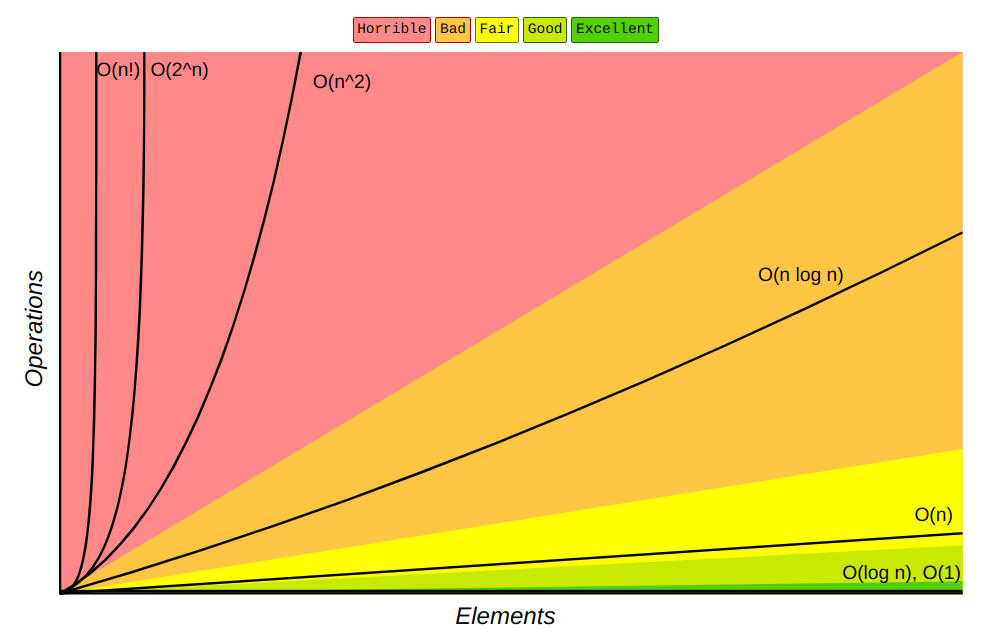

***
### Complexité des algorithmes :


<u><b>Bubble sort :</b></u>

Le tri à bulle consiste à comparer répétitivement les éléments adjacents d'un tableau et à les échanger s'ils sont mal triés jusqu'à ce que ce dernier soit totalement trié.

-- Pire des cas :

Le pire des cas pour cet algorithme sera quand le tableau sera initialement trié par ordre décroissant : 
 - La 1er boucle (repeat), la boucle externe continue tant que le tableau n'est pas totalement trié, on aura donc au pire n-1 itération. 
 - La seconde boucle, compare entre eux les éléments adjacents du tableau et les échange s'ils ne sont pas triés. Au 1er pasage on aura n-1 comparaisons, puis au second toujours n-1 puisque dans cette version on continue de comparer les élements déjà triés.

Ainsi, pour le pire des cas, on aura une complexité de (n-1)+(n-1)+....+(n+1)= n(n-1) = $n^2-n$ que l'on simplifie en <B>$O(n^2)$</B>
La complexité est donc quadratique (polynomiale).

-- Meilleur des cas : 

Le meilleur des cas se produit quand le tableau est deja trié. La boucle interne ne fera donc qu'un passage de (n-1) comparaison.

Ainsi la complexité dans le meilleur des cas sera de O(n-1) que l'on simplifie en <u>$O(n)$</u>. La complexité est donc linéaire.

-- Cas moyen : 

La complexité dans le cas moyen sera $O(n^2)$ (Source : wikipedia)

-- Complexité spatiale :
 

La complexité spatiale sera ici $O(1)$ puisque l'agorithme utilise un nombre fixe de variables (n et i). Il n'utilisera donc pas de mémoire supplémentaire proportionnelle à la taille du tableau. La complexité est donc constante. 


<u><b> Optimized bubble sort :</b></u>

Dans cette version, du tri à bulle, on ne compare plus le dernier élement du tableau qui est après une iteration est à sa place, en réduisant ainsi la taille du tableau de 1 à chaque itération.

-- Pire des cas : 

Le pire des cas reste le même, lorsque le tableau est trié par ordre décroissant. La 1er boucle effectue toujours n-1 itérations dans le pire des cas. Le changement se situe dans la boucle interne où l'on aura n-1 au 1er passage puis n-2 au second et ce jusqu'à 1.

Cela nous donne donc (n-1)+(n-2)+(n-3)+...+1 = $(n(n-1)/2)$ qui est simplifié en <B>$O(n^2)$</B>.

-- Cas moyen : 

Le cas moyen sera ici meilleur que celui de l'algorithme non optimisé puisqu'on reduit le tableau à chaque iteration ce qui nous permet de gagner un peu de temps. 

-- Meilleur des cas : 

Le meilleur des cas reste similaire, on efectue un unique passage. La complexité reste $O(n)$. 

-- Complexité spatiale :

La complexité spatiale reste également similaire : $O(1)$.

La complexité théorique selon la notation big O reste donc similaire, cependant en théorie on devrait gagner un peu de temps grâce à cette amélioration puisque l'on n'effectue plus de comparaison inutile lorsque les éléments sont à leur place.


<u><b> Doubly optimized bubble sort :</b> </u>

Dans cette version, on optimise l'algorithme en utilisant "newn" qui garde en mémoire la dernière position à laquelle un échange a été effectué. Cela siginifie que après "newn", plus aucun changement ne sera effectué puisque le tableau est deja trié. On reduit ansi le nombre de comparaisons dans la prochaine itération. Dans la version optimized on réduisait de 1 à chaque itération, ici on peut réduire de plus à chaque itération si c'est possible. 

-- Pire des cas : 

Dans le pire des cas, cette optimisation ne change rien, à chaque iteration on continura de réduire le tableau de 1. On aura toujours (n-1)+(n-2)+(n-3)+...+1 = $(n(n-1)/2)$ qui est simplifier en <B>$O(n^2)$</B>.

-- Meilleur des cas : 

Ici également le meileur des cas sera similaire aux versions précedentes. $O(n)$. 

-- Complexité spatiale :

La complexité spatiale reste également similaire : $O(1)$. On utilise toujours uniquement de la mémoire fixe. 

Cet algorithme ne change pas grand-chose dans les cas extrêmes, mais il nous permet de gagner du temps supplémentaire comparé aux autres versions surtout dans les cas où l'on a un tableau partiellement trié.

***

<u><b>Selection sort</b></u>

Cette algorithme consiste à diviser le tableau donné en deux parties, une partie triée et une partie non triée. A chaque itération, l'algorithme cherche le plus petit élement de la partie non triée et l'échange avec le 1er élément de cette même partie, ce qui permet à la partie triée de gagner un élément à chaque itération, réduisant ainsi la taille de la partie non triée de un.

-- Pire des cas / Meilleur des cas / cas moyen  :

 Dans tous les cas, la complexité reste la même, que les éléments soient déjà triés ou non. L'algorithme fera n-1 comparaisons lors du 1er passage puis réduira la partie du tableau qu'il considère comme non triée (même si cette partie peut être déjà triée), réalisant une comparaison et un échange sur un tableau de taille réduite à n−2 lors de l'itération suivante, et ainsi de suite jusqu'à 1.

On a donc dans tout les cas (n-1)+(n-2)+(n-3)+...+1 = $(n(n-1)/2)$ qui est simplifié en <B>$O(n^2)$</B>. La complexité est donc quadratique (polynomiale).

-- Complexité spatiale:

La complexité sera $O(1)$ puisqu'il utilse un nombre fixe de variables qui ne depend donc pas de la taille du tableau. La complexité est donc constante. 

***

<u><b>Insertion sort</b></u>

Cet algorithme consiste à construire une liste triée progressivement, il prend chaque élément individuellement et le place à sa position attendue dans une liste déjà triée. Il prend le 1er élément, qui est considéré comme trié, puis prend le deuxième élément, le compare à ceux de la liste triée (donc le 1er élément), et l'insère à la bonne position (soit en 1ère ou 2ème position). Ainsi de suite jusqu'à ce que tous les éléments soient triés.

-- Pire des cas : 

Le pire des cas a lieu lorsque le tableau est trié par ordre inverse puisque chaque élément pris individuellement devra être comparé avec chaque élément déjà trié. On aura donc à la 1ère itération 1 comparaison puis 2, ainsi de suite jusqu'à n-1 comparaisons pour le dernier élément.

Ainsi on a pour la complexité : 1+2+3+....+(n-1) = $(n(n-1)/2)$ qui est simplifié en <B>$O(n^2)$</B>. La complexité est donc quadratique (polynomiale).

-- Meileur des cas : 

Le meilleur des cas a lieu lorsque le tableau est déjà trié. Pour chaque élément pris individuelement, l'algorithme le comparera uniquement avec l'élément le plus grand de la liste déjà triée puisque l'élément sélectionné est forcément plus grand. On aura donc n-1 fois une comparaison.

Ainsi on a : 1+1+1+...+1 = n-1 que l'on simplifie en <B>$O(n)$</B>

-- Cas moyen : 

La complexité du cas moyen est <B>$O(n^2)$</B> (source : wikipedia).

-- Complexité spatiale : 

L'algorithme utilise uniquement un nombre fixe de variables qui n'augmente pas en fonction de la taille du tableau (i, n...). La complexité est donc constante $O(1)$.



<u><b>Optimized insertion sort</b></u>

Dans cette version, on utilise une variable temporaire x pour stocker l'élément selectionné. Cela permet de déplacer tous les éléments plus grands vers la droite en une seule opération et éviter les échange repétés de la 1er version entre l'élément sélectionné et la liste triée.

-- Pire des cas : 

Le pire des cas reste similaire, il a lieu lorsque le tableau est trié par ordre inverse. Il fait toujours 1 comparaison, puis 2, puis 3, ainsi de suite pour trouver l'endroit où insérer l'élément et déplacer tous les éléments à sa droite.

Ainsi on aura toujours 1+2+3+....+(n-1) = $(n(n-1)/2)$ qui est simplifier en <B>$O(n^2)$</B> et donc une compexité quadratique (polynomiale).

-- Meilleur des cas : 

Le meilleur des cas reste également similiare, on aura à chaque fois une seule comparaison. On a donc toujours <B>$O(n)$</B>. 


-- Complexité spatiale : 

La complexité spatiale également ne change pas et reste constante $O(1)$. X ne depend pas de la taille du tableau.


L'optimisation rend l'algorithme légèrement plus efficace dans le placement de l'élément sélectionné.


***



<u><b>Heap sort</b></u>

Cette méthode de tri utilise une représentation en arbre binaire du tableau. Pour cela, l'algorithme réorganise d'abord le tableau pour le transformer en un tas, (un arbre binaire presque complet), où chaque parent est supérieur à ses enfants en partant à chaque fois de la racine. Une fois le tas construit, l'algorithme place la racine (le plus grand élément) à la fin du tableau puis réduit la taille du tas et répéte ce processus jusqu'à obtenir un tableau totalement trié. Heapify(A, n, i) permet de s'assurer récursivement que le parent est plus grand que ses enfants. Si cela n'est pas le cas, cette fonction échange les positions. Enfin, HeapSort(A) se charge de la construction de l'arbre initial, puis du tri en regroupant la liste.

-- Pire des cas/Meilleur des cas/cas moyen :

Pour cette algorithme, il n'y a pas de meilleur des cas ou pire cas puisque dans tout les cas, l'algorithme va remélanger le tableau pour construire un arbre.
L'algorithmes se décompose en 2 phases, la phase de construction de l'arbre et la phase de reconstruction du tableau. Dans la phase de construction du tas,l'agorhitme utilise heapify sur chaque parent en partant du bas de l'arbre jusqu'à remonter à la racine. La complexité de cette partie dépend de la taille de l'arbre, proche de la racine, la complexité de la fonction heapfy sera de O(log n). Cependant proche des feuilles qui sont plus nombreuses, la complexité sera diminuée et sera de O(n) puisque il y a moins de comparaisons à faire. En conclusion, on prendra pour cette partie une complexité de O(n) en faisant une moyenne de la complexité pour cette phase. 
La seconde partie, celle de la reconstruction du tableau, demandera une complexité <B>$O(n log(n))$</B> car à chaque récuperation de la valeur de la racine, Log(n) opération (qui corespond à la hauteur d'un arbre complet) sera nécessaire pour le réarrangement de l'arbre. Cette opération est repetée pour chaque élement donc n fois jusqu'à ce que le tableau soit trié. D'où <B>$O(n log(n))$</B> qui est une complexité linéarithmique.

-- Complexité spatiale : 

La complexité est constante $O(1)$ car on utilise uniquement le tableau qui est déjà crée ainsi que de variables temporaires. On ne creer donc pas d'allocation memoriel suplementaire en fonction de la taille n. 

***


<u><b>Quicksort</b></u>

Cet algorithme utilise la méthode de diviser pour règner. Il utilise un "pivot" dans le tableau et partitionne les autres éléments en deux sous-tableaux, selon s'ils sont inférieurs ou supérieurs au pivot. Les sous-tableaux sont ensuite triés par recursivité.

-- Le pire des cas : 

Le pire des cas a lieu lorsque le tableau est déjà trié en ordre inverse, ou presque complètement trié. Ces cas entraînent des divisions très mal équilibrées, comme par exemple avec d'un côté un sous-tableau de taille n-1 et de l'autre un seul élément. Cela amène un nombre de récurrences proportionnel à la taille du tableau n car à chaque appel, il n'y a qu'un seul élément de moins à traiter. On a donc la récurrence T(n) = T(n−1)+O(n). Qui nous donne en resolvant T(n)=T(1)+O(2)+O(3)+…+O(n) = O(1+2+3+…+n) = O((n(n+1))/2) = <B>$O(n^2)$</B>. 

La complexité est donc quadratique  <B>$O(n^2)$</B>.

-- Le meilleur des cas : 

Le meilleur cas a lieu lorsque le tableau est trié deux à deux, par exemple: [1,4,2,6,3,8]. À chaque divison, on a ainsi des sous-tableaux de taille n/2 qui nous donne la récurrence T(n)=2T(n/2)+O(n) qui se resout en <B>$O(n Log(n))$</B> qui est une complexité linéarithmique.

-- Cas moyen : 

La complixité pour le cas moyen est <B>$O(n Log(n))$</B> (source : wikipedia)

-- Complexité spatiale : 

Dans le pire des cas, on a une complexité spatiale de $O(n)$ car la pile atteint la taille du tableau. Sinon, on a une profondeur de pile <B>$O(Log(n))$</B>

***

<u><b>Merge sort top down</b></u>

Le tri fusion utilise également la méthode diviser pour règner dans le cas de la version top down. Il divise le tableau récursivement en sous-listes de plus en plus petites jusqu'à n'avoir plus qu'un seul élément par sous-liste. Finalement, les sous-listes sont fusionnées pour construire une liste triée.

-- Pire des cas / Meilleur des cas / cas moyen : 

Il n'y a pas de scénario meilleur qu'un autre, dans tous les cas ce sont les mêmes opérations qui sont effectuées. À chaque récurrence, le tableau est divisé par 2. On aura donc Log(n) récursions. Ensuite, on refusionne les sous-tableaux de n éléments, on aura donc ici O(n). Au final, on aura donc une complexité linéarithmique <B>$O(n Log(n))$</B>.

-- Complexité spatiale : 

La complexité spatiale sera ici de <B>$O(n)$</B>, on crée des sous-tableaux temporaires en mémoire pour stocker les sous-listes avant de les fusionner.

<u><b>Merge sort bottom up</b></u>

Cette version est la version itérative du tri fusion. Ici l'agorithme commence par la fusion de sous-listes de taille 1, puis à chaque itération augmente leurs tailles de 1. Par exemple pour L=[8, 3, 7, 1] on aura [8] et [3] qui deviennent [3, 8] et [7] [1] deviennent [1, 7] (dans L on aura [3, 8, 1, 7]) pour ensuite que [3, 8] et [1, 7] soient fusionnés pour avoir la liste triée [1, 3, 7, 8]

-- Pire des cas / Meilleur des cas / cas moyen : 

Une nouvelle fois, il n'y aura pas de scénario meilleur qu'un autre, dans tous les cas ce sont les mêmes opérations qui sont effectuées. De la même manière que dans la version top down, le tableau est divisé en sous-tableaux de tailles différentes, sauf qu'ici on le fait dans le sens inverse (on part de 1 et on remonte alors que dans la version précédente on part du tableau pour descendre à 1), on retrouve la complexité Log(n) pour ces divisions. On a également une complexité O(n) pour la réfusion. Au final, on retrouve donc la même complexité linéarithmique <B>$O(n Log(n))$</B>.

-- Complexité spatiale : 

La complexité spatiale sera également de <B>$O(n)$</B>. Cependant, la différence ici est qu'il s'agit de la version itérative, on crée donc un seul tableau temporaire de la taille du tableau initial n et non pas plusieurs sous-listes temporaires comme la version précédente.

***
***
# 2.1 et 3 : Complexité empirique et identification des cas

<u><b>Bubble sort et ses optimisations</b></u>

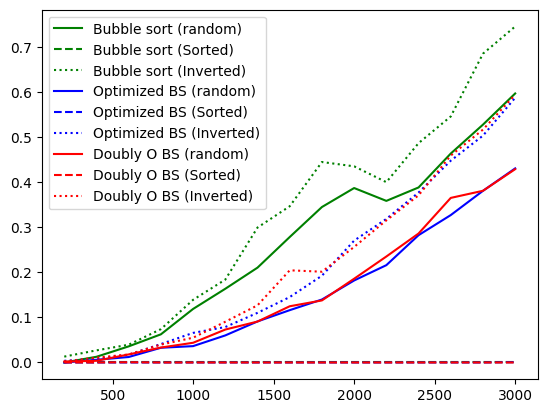

In [20]:
executerTri(bubble_sort,'g','Bubble sort')
executerTri(optimized_bubble_sort,'b','Optimized BS')
executerTri(doubly_optimized_bubble_sort,'r','Doubly O BS')

<b>Bubble sort :</b>
- On peut voir que comme annoncé théoriquement le <b>pire des cas</b> a lieu lorsque le tableau est inversé, le <b>cas moyen</b> lorsque les emplacements sont aléatoires (Le cas moyen est généralement une moyenne sur l'ensemble des ordres d'éléments possible.) et enfin <b>le meilleur cas </b> quand le tableau est déjà trié.
- De plus, la théorie est confirmée, la complexité sur le graphique suit dans le pire des cas et dans le cas moyen une fonction quadratique, <b>$O(n^2)$</b> et dans le meilleur une fonction linaire <b>$O(n)$</b> .

<b>Optimized bubble sort :</b> 
- De même, le <b>pire des cas</b> a lieu lorsque le tableau est inversé, le <b>cas moyen</b> lorsque les emplacements sont aléatoires et enfin <b>le meilleur cas</b> quand le tableau est déjà trié. 
- Ici aussi, la complexité sur le graphique suit dans le pire des cas et dans le cas moyen une fonction quadratique <b>$O(n^2)$</b>  et dans le meilleur une fonction linaire <b>$O(n)$</b>.

<b>Doubly Optimized bubble sort :</b>
- Ici encore, le <b>pire des cas</b> a lieu lorsque le tableau est inversé, le <b>cas moyen</b> lorsque les emplacements sont aléatoires et <b>le meilleur cas</b> quand le tableau est déjà trié. 
- Egalement, la complexité sur le graphique suit dans le pire des cas et dans le cas moyen une fonction quadratique <b>$O(n^2)$</b>  et dans le meilleur une fonction linaire <b>$O(n)$</b>.

Ainsi, toutes les complexités trouvées théoriquement pour le tri à bulle sont confirmées graphiquement. En général, pour le tri à bulle, on aura le <b>pire des cas</b> <b>$O(n^2)$</b> quand le tableau est inversé, le <b>cas moyen</b> <b>$O(n^2)$</b> lorsque les emplacements sont aléatoires et <b>le meilleur cas</b>  <b>$O(n)$</b> quand le tableau est déjà trié.

***

<u><b>Selection sort</b></u>

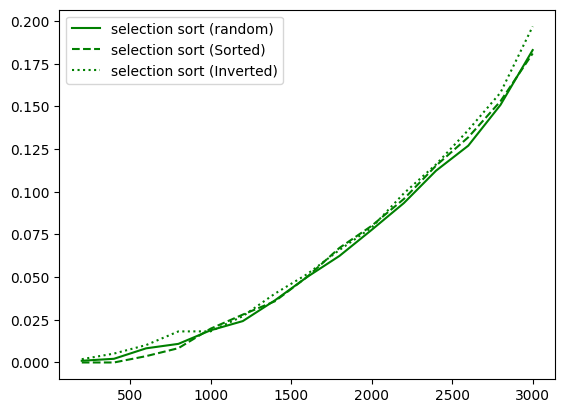

In [29]:
executerTri(selection_sort,'g','selection sort')

- Comme énoncé théoriquement, il n'y a pas de <b>pire cas</b>, <b>meilleur cas</b> ou <b>cas moyen</b>, peu importe la disposition de base du tableau, les complexités sont équivalentes.
- Dans l'ensemble des cas graphiquement, la complexité suit une fonction quadratique <b>$O(n^2)$</b>, ce qui confirme la théorie.


***

<u><b>Insertion sort et ses optimisations</b></u>

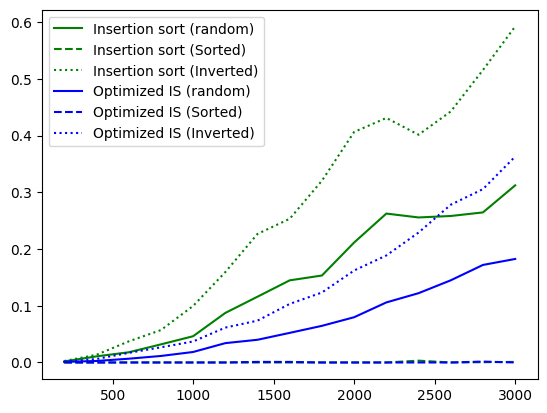

In [15]:
executerTri(insertion_sort,'g','Insertion sort')
executerTri(optimized_insertion_sort,'b','Optimized IS')

<b>Insertion sort :</b>

- Graphiquement, on peut voir que  le <b>pire des cas</b> a lieu lorsque le tableau est inversé, le <b>cas moyen</b> lorsque les emplacements sont aléatoires et <b>le meilleur cas</b> quand le tableau est déjà trié. 
- Comme annoncé théoriquement, on retrouve graphiquement, dans le <b>pire des cas</b> une complexité quadratique <b>$O(n^2)$</b>, dans <b>le cas moyen</b>  également une complexité quadratique <b>$O(n^2)$</b> mais bien inférieure au pire des cas, enfin dans <b>le meilleur des cas</b> on a une complexité <b>$O(n)$</b>

<b>Optimized insertion sort :</b>


- De même, graphiquement, on peut voir que  le <b>pire des cas</b> a lieu lorsque le tableau est inversé, le <b>cas moyen</b> lorsque les emplacements sont aléatoires et <b>le meilleur cas</b> quand le tableau est déjà trié.
- On retrouve les mêmes complexités que la version non optimisée, dans le <b>pire des cas</b> : <b>$O(n^2)$</b>, dans le <b>cas moyen</b> : <b>$O(n^2)$,et dans le <b>meilleur des cas</b> : <b>$O(n)$</b>.

***

<u><b>Heap sort</b></u>

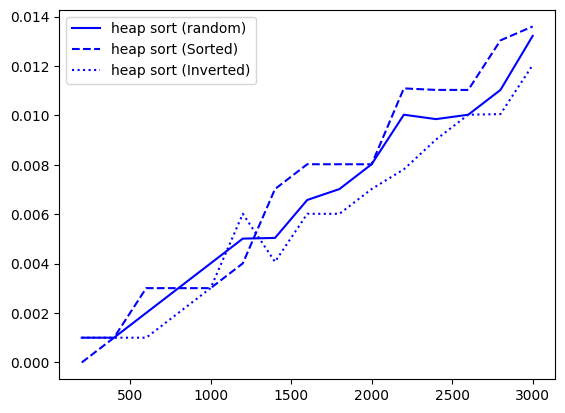

In [29]:
executerTri(heap_sort,'b','heap sort')

- On peut voir graphiquement que en moyenne, le <b>pire cas</b>, le <b>meilleur cas</b> et le <b>cas moyen</b> sont plutôt similaires, les tableaux déjà triés sont peut être légèrement plus lent à être triés que les tableaux inversés, mais cela reste minime.
- Graphiquement, l'ensemble des cas suit en moyenne une fonction linéarithmique <B>$O(n log(n))$</B>, ce qui vérifie empiriquement la théorie. 

***

<u><b>Quicksort</b></u>


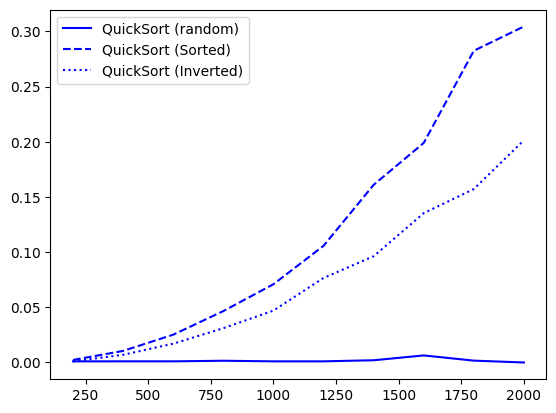

In [51]:
executerTri(quick_sort_wrapper, 'b', 'QuickSort', nlist=10, nval=200, surplace=True)

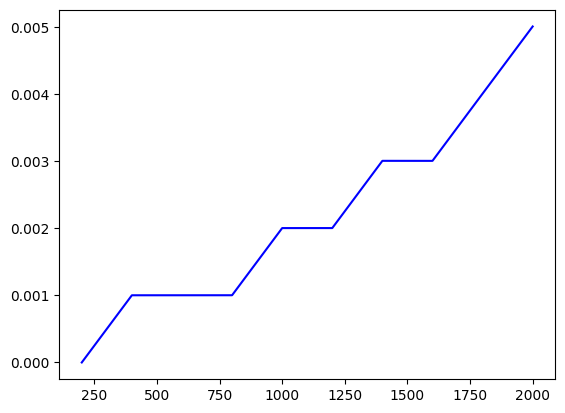

In [141]:
executerTrirandom(quick_sort_wrapper, 'b', 'QuickSort', nlist=10, nval=200, surplace=True)


(Pour cette version de tri la taille des tableaux maximale est réduite à 2000 sinon le programme plante du au fait d'un trop gros nombre d'appels récursifs)

- Graphiquement, on peut voir que le <b>pire cas</b> a lieu quand le tableau est déjà trié, le <b>cas moyen</b> quand le tableau est aléatoire et ici nous ne pouvons pas identifier de <b>meilleur des cas</b> puisque les 2 autres cas que nous avons (un tableau trié et un tableau inversé) sont tous les 2 bien pires que le cas moyen. Ainsi, nous ne pouvons pas définir graphiquement le meilleur des cas, mais théoriquement nous avions trouvé que le meilleur des cas a lieu lorsque les tableaux sont triés 2 à 2. On pourrait alors dire que le meilleur cas ici, est le cas aléatoire.
- Dans un premier temps, on peut voir graphiquement que le pire des cas suit une fonction quadratique <B>$O(n^2)$</B>, pour le cas moyen, on pourrait croire que graphiquement, elle suit une fonction linéaire <B>$O(n)$</B>, mais en zoomant sur la fonction, on s'aperçoit qu'elle suit bien une complexité linéarithmique <B>$O(n Log(n))$</B>, comme annoncé théoriquement.

Le fait de devoir zoomer provient sûrement du fait que le cas moyen est bien meilleur que les 2 autres cas. Ceci peut être expliqué par le fait qu'en prenant des nombres aléatoires, on réduit grandement le nombre de divisions récursives effectuées, alors que dans le pire des cas, on fait une division par valeur.

***

<u><b>Merge sort</b></u>

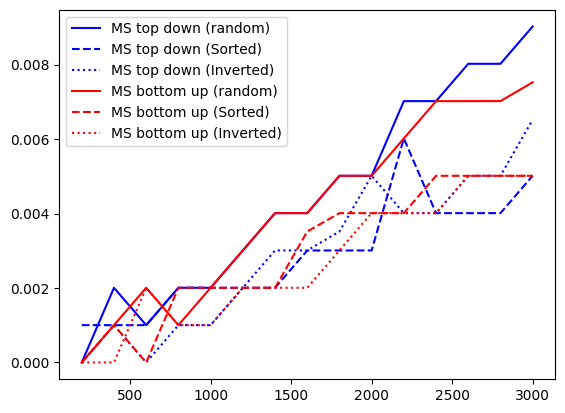

In [24]:
executerTri(merge_sort_top_down, 'b', 'MS top down', nlist=15, nval=200, surplace=False)
executerTri(merge_sort_bottom_up, 'r', 'MS bottom up', nlist=15, nval=200, surplace=False)


<b>Merge sort top down et Merge sort bottom up :</b>

Comme annoncé théoriquement, on peut voir graphiquement qu'il n'y a pas de réelle différence entre la version top down et bottom up.

- On peut voir qu'il n'y a pas de réelle différence entre les différentes façons d'entrer les tableaux, ainsi il n'y a pas vraiment de <b>pire</b> ou <b>meilleur cas</b>. Ils sont tous similaires au <b>cas moyen.</b>

- Graphiquement, bien que les courbes soient dispersées, elles suivent toutes une tendance de complexité linéarithmique <B>$O(n Log(n))$</B>. Ce qui vérifie empiriquement la théorie.


***
***



# 4 et 5 Comparaison des algorithmes et explication :

Dans cette partie, nous allons comparer les différents algorithmes précédents de plusieurs manières différentes et chercher à voir lequel est le meilleur et pourquoi.

<u><b>Les versions optimisées :</b></u>

<b> Bubble sort :</b>



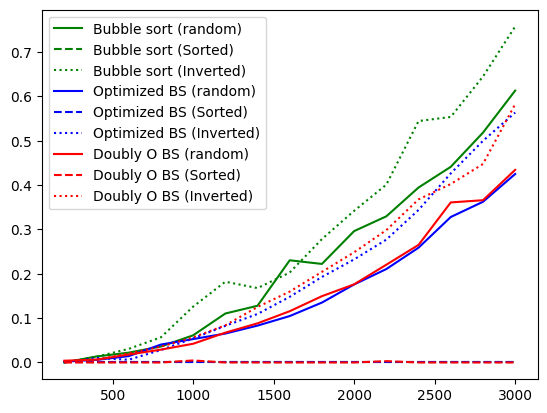

In [22]:
executerTri(bubble_sort,'g','Bubble sort')
executerTri(optimized_bubble_sort,'b','Optimized BS')
executerTri(doubly_optimized_bubble_sort,'r','Doubly O BS')

<b>Explication :</b>

- Graphiquement, on peut voir que la version non optimisée (en vert) est la pire des 3 versions et la meilleure est celle doublement optimisée. Cependant, lorsque les tableaux sont déjà triés, les 3 versions sont équivalentes. La différence entre la version optimisée et doubly optimiser est plus ou moins équivalente.

- La 1ère version optimisée qui consiste à réduire de 1 le tableau (comme vue dans la partie théorique) et la seconde (qui consiste à réduire le tableau de 1 ou plus) nous permet de gagner un peu de temps comparé à la version non optimisée puisque, comme expliqué précédemment (dans la partie théorique), on ne fait pas de comparaison inutile. De plus, on pourrait s'attendre à ce que la seconde version (doubly), nous fasse à nouveau gagner un peu de temps comparé à la 1ère (optimized), mais graphiquement on ne voit pas de réelle différence. Sur les tableaux inversés, cela est logique puisque la seconde version réduira tout comme la 1ère version de 1 le tableau à chaque itération. Le non-gain sur les tableaux aléatoires est peut-être en lien avec la chance, on a rarement de grosses parties de tableaux déjà un minimum triées dans un tableau aléatoire.
- Le fait que la courbe soit similaire pour les tableaux déjà triés est dû au fait que les 3 versions ne feront qu'une itération de comparaison des valeurs sur le tableau complet avant de s'apercevoir que le tableau est déjà trié et donc que le tri est inutile.
 
=> On préférera alors utiliser la version doubly optimized du tri à bulle puisqu'il est similaire à la version optimized, mais dans le cas où on a de la chance, avec des valeurs déjà triées dans le tableau random, on gagnera légèrement du temps. On peut également conclure que l'optimisation entre la version classique et optimisée est plus importante qu'entre les deux versions optimisées.

***

<b>Insertion sort :</b>

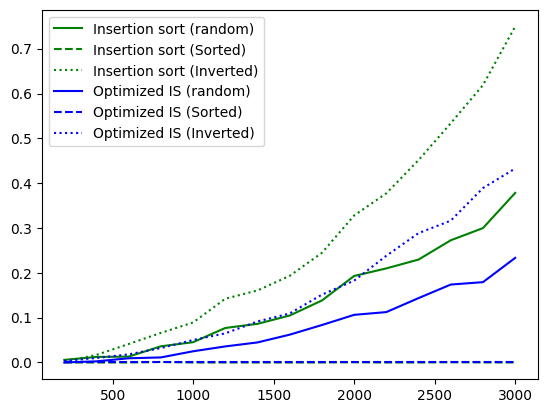

In [22]:
executerTri(insertion_sort,'g','Insertion sort')
executerTri(optimized_insertion_sort,'b','Optimized IS')

<b>Explication :</b>

- Graphiquement, on voit que la version optimisée nous permet bien de gagner du temps sur la version non optimisée dans le cas random et inverted. On voit également que comme le tri à bulles, la version sorted est similaire.

- Le gain de temps s'explique par la manière de déplacer les éléments (expliquer dans la partie théorique) qui varie entre les 2 versions. Le déplacement dans la version non optimisée est bien plus long que dans la version optimisée
-  Le fait que la courbe des tableaux sorted soit similaire est explicable de la même manière que le bulle sort. L'algorithme passe une fois et s'aperçoit que le tableau est trié.

=> Il est donc important d'utiliser la version optimisée afin de gagner du temps

***
<b>Merge sort :</b>

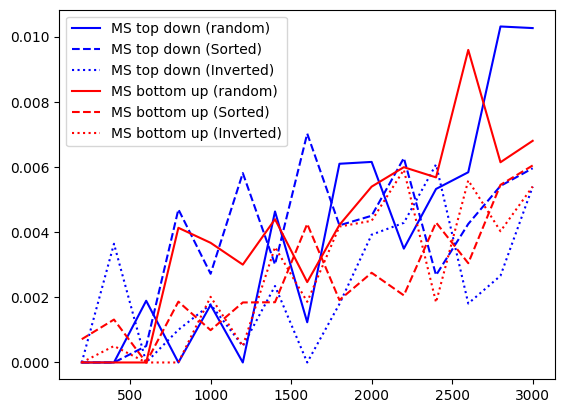

In [47]:
executerTri(merge_sort_top_down, 'b', 'MS top down', nlist=15, nval=200, surplace=False)
executerTri(merge_sort_bottom_up, 'r', 'MS bottom up', nlist=15, nval=200, surplace=False)

<b>Explication :</b>

- Graphiquement, bien que les courbes soient dispersées, on s'aperçoit que les 2 versions sont plutôt similaires, comme déjà vu dans les parties précédentes.

- Le fait que les 2 versions soient similaires vient du fait que dans les 2 versions on fait les mêmes opérations. Que ce soit en utilisant la version top down où on divise récursivement le tableau pour le refusionner, ou dans la version itérative bottom up où on part de la liste divisée pour la reconstruire, on fait les mêmes opérations mais dans le sens inverse. Cela paraît donc logique que l'on ait un peu près les mêmes performances entre les 2 versions.

=> Dans les comparaisons suivantes, on pourra utiliser l'un des 2 algorithmes pour le comparer aux autres puisque les 2 sont plus ou moins similaires.

***

<b><u>Les pires cas :</u></b>

On cherche ici le pire des pires des cas des algorhithmes : 

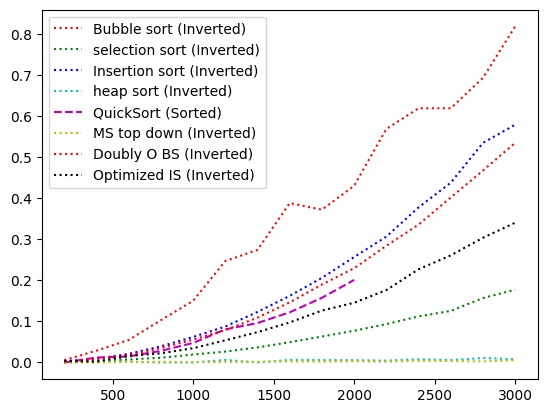

In [47]:
executerTriInvertedSorted(bubble_sort,'r','Bubble sort')
executerTriInvertedSorted(selection_sort,'g','selection sort')
executerTriInvertedSorted(insertion_sort,'b','Insertion sort')
executerTriInvertedSorted(heap_sort,'c','heap sort')
executerTriSorted(quick_sort_wrapper, 'm', 'QuickSort', nlist=10, nval=200, surplace=True)
executerTriInvertedSorted(merge_sort_top_down, 'y', 'MS top down', nlist=15, nval=200, surplace=False)

executerTriInvertedSorted(doubly_optimized_bubble_sort,'r','Doubly O BS')
executerTriInvertedSorted(optimized_insertion_sort, 'k' ,'Optimized IS')

<b>Explication :</b>

- Graphiquement on peut conclure que le pire des pires cas est l'algorithme bubble sort classique, le 2ème et 3ème pire sont insertion sort et boubly optimized bubble sort. Les 2 meilleurs des pires cas sont heap sort et merge sort

- Ces resultats sont logiques quand on regarde la compexité établie précédemment, les pire cas,  bubble sort et insertion sort suivent une fonction <B>$O(n^2)$</B>. On peut cependant s'apercevoir grâce au graphique qu'elles sont pires que quick sort, optimized insertion sort et selection sort qui sont également en <B>$O(n^2)$</B> pour le pire cas. De la même manière, on pouvait s'attendre à ce que les 2 meilleurs soient heap sort et merge sort qui suivent une fonction linéarithmique <B>$O(n Log(n))$</B>.


=> Ainsi si l'on souhaite un algorhitme qui est efficace même dans le pire cas il faudra choisir heap sort ou merge sort. 

***


<b><u>Les meilleurs des  cas :</u></b>

On cherche ici le meilleur des meilleurs des cas des algorhithmes : 

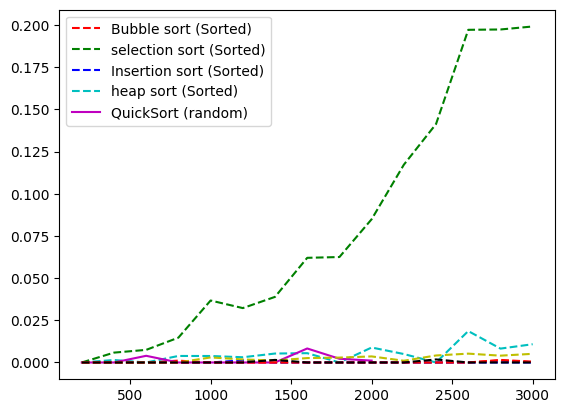

In [24]:
executerTriSorted(bubble_sort,'r','Bubble sort')
executerTriSorted(selection_sort,'g','selection sort')
executerTriSorted(insertion_sort,'b','Insertion sort')
executerTriSorted(heap_sort,'c','heap sort')
executerTrirandom(quick_sort_wrapper, 'm', 'QuickSort', nlist=10, nval=200, surplace=True)
executerTriSorted(merge_sort_top_down, 'y', 'MS top down', nlist=15, nval=200, surplace=False)

executerTriSorted(doubly_optimized_bubble_sort,'r','Doubly O BS')
executerTriSorted(optimized_insertion_sort,'k','Optimized IS')

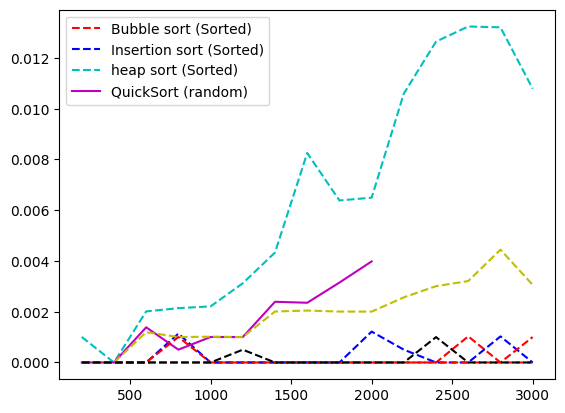

In [28]:
executerTriSorted(bubble_sort,'r','Bubble sort')

executerTriSorted(insertion_sort,'b','Insertion sort')
executerTriSorted(heap_sort,'c','heap sort')
executerTrirandom(quick_sort_wrapper, 'm', 'QuickSort', nlist=10, nval=200, surplace=True)
executerTriSorted(merge_sort_top_down, 'y', 'MS top down', nlist=15, nval=200, surplace=False)

executerTriSorted(doubly_optimized_bubble_sort,'r','Doubly O BS')
executerTriSorted(optimized_insertion_sort,'k','Optimized IS')

<b>Explication :</b>

- Graphiquement, on voit que le pire des meilleurs cas est largement sélection sort, puis les autres sont plutôt similaires. En zoomant, on s'aperçoit que heap sort, quick sort et merge sort sont un peu moins performants que les autres.

- En regardant les complexités, ces résultats paraissent logiques. La sélection sort est le seul meilleur cas en <B>$O(n^2)$</B>, les trois légèrement supérieurs sont en <B>$O(n Log(n))$</B> et toutes les autres en <B>$O(n)$</B>. 

- Le fait que sélection sort soit le seul pire s'explique par le fait que cette méthode compare l'ensemble des éléments un par un à chaque itération (en réduisant de 1 la taille du tableau à chaque fois) et ce même lorsqu'ils sont déjà triés. Ces opérations de comparaison sont longues et inutiles, ce qui rend cet algorithme aussi inefficace même dans le meilleur des cas.

- Heap sort, quick sort et merge sort ont des performances plutôt similaires dans leur meilleur des cas (on n'a pas vraiment le meilleur des cas pour quick sort, il faudrait prendre des listes triées 2 à 2). Ces algorithmes ont en commun d'utiliser tous les 3 la récursivité qui rend leur traitement plus complexe que les versions itératives mais généralement plus efficace. De plus, hep sort et merge fonctionnent de la même manière, peu importe la façon dont la liste est triée initialement. Quick sort fonctionne également de la même manière, c'est juste le choix du pivot qui changera (on peut avoir des pivots plus efficaces que d'autres (le meilleur pivot est lorsque la liste est triée 2 par 2)). Ces 2 éléments expliquent donc le fait que ces 3 algorithmes sont plutôt similaires et expliquent également le fait qu'ils soient légèrement moins performants que les autres algorithmes restants qui ne font pas d'opération unitaire lorsque les listes sont déjà triées.

- En effet, les autres algorithmes, bubble sort (et ses optimisations) et  insertion sort (et ses optimisations), sont les meilleurs des meilleurs cas du fait que ces 2 algorithmes ne font qu'un passage avant de s'apercevoir que le tableau est déjà trié, ce qui est plus rapide que de refaire des Opérations répétitives inutiles.


***

<b><u>Les meilleurs des cas moyen :</u></b>

On cherche ici le meilleur des cas moyen des algorhithmes donc le meilleur avec des tableaux aleatoires : 


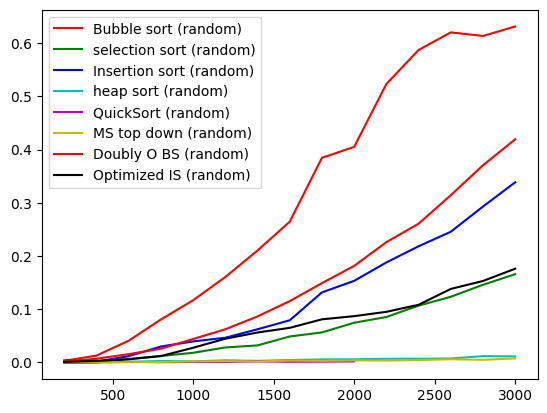

In [34]:
executerTrirandom(bubble_sort,'r','Bubble sort')
executerTrirandom(selection_sort,'g','selection sort')
executerTrirandom(insertion_sort,'b','Insertion sort')
executerTrirandom(heap_sort,'c','heap sort')
executerTrirandom(quick_sort_wrapper, 'm', 'QuickSort', nlist=10, nval=200, surplace=True)
executerTrirandom(merge_sort_top_down, 'y', 'MS top down', nlist=15, nval=200, surplace=False)

executerTrirandom(doubly_optimized_bubble_sort,'r','Doubly O BS')
executerTrirandom(optimized_insertion_sort, 'k' ,'Optimized IS')

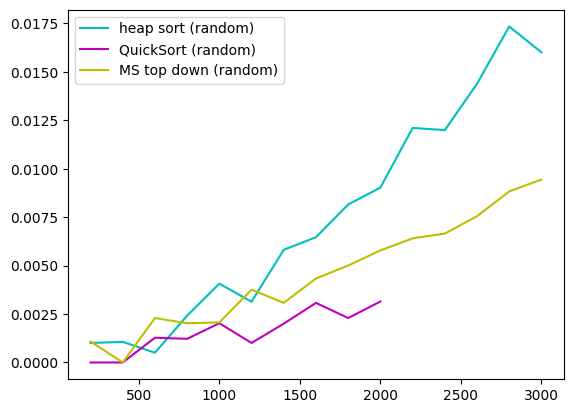

In [41]:
executerTrirandom(heap_sort,'c','heap sort')
executerTrirandom(quick_sort_wrapper, 'm', 'QuickSort', nlist=10, nval=200, surplace=True)
executerTrirandom(merge_sort_top_down, 'y', 'MS top down', nlist=15, nval=200, surplace=False)


<b>Explication :</b>

- Graphiquement, on s'aperçoit que le pire cas des cas moyens est bubble sort (et ses optimisations) puis insertion sort.  Sélection sort et optimzed insertion sort sont plutôt similaires et enfin les 3 meilleurs dans les cas moyens d'utilisation sont quick sort, heap sort et merge sort. En zoomant on s'aperçoit que le meilleur des 3 est QuickSort.

- Une nouvelle fois cela est logique en regardant les complexités, quick sort, heap sort et merge sort ont une complexité dans le cas moyen de <B>$O(n Log(n))$</B> alors que tous les autres ont une complexité <B>$O(n^2)$</B>

- Ce qui distingue les 3 meilleures versions des autres est le fait que ces versions utilisent de la récursivité et divisent le problème en sous-problèmes plus simples, ce qui les rend plus efficaces et performantes que les versions itératives comme Bubble sort par exemple qui effectue des comparaisons d'élément à élément à chaque itération. Ce qui rend Quick sort plus efficace que les autres est sa façon de diviser le problème en partitions par forcément égales avec sa méthode de pivot (dans notre version on prend toujours le dernier élément comme pivot), alors que les 2 autres divisent le problème en sous-tableaux équivalents mais pas forcément en sous-problèmes équivalents, ce qui donne un léger avantage à quicksort.

- Ce qui rend bubble sort (et ses optimisations) et insertion sort moins performants que optimized insertion sort et selection sort est la façon dont les éléments sont comparés et déplacés. Dans bubble sort et insertion sort, on déplace les éléments en inversant les éléments 1 à 1 à chaque comparaison, ce qui crée des mouvements inutiles. Alors que dans optimiser insertion sort et selection sort, on déplace l'élément d'un seul coup et on le met à sa place définitive, ce qui n'est pas le cas dans les 2 autres algorithmes moins performants.



*** 

<b><u>Les meilleurs des tableaux inversés :</u></b>

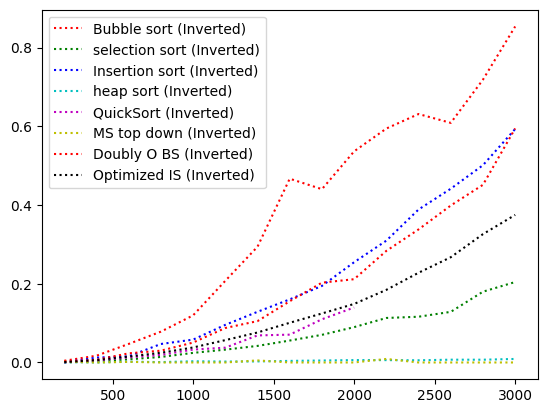

In [43]:
executerTriInvertedSorted(bubble_sort,'r','Bubble sort')
executerTriInvertedSorted(selection_sort,'g','selection sort')
executerTriInvertedSorted(insertion_sort,'b','Insertion sort')


executerTriInvertedSorted(heap_sort,'c','heap sort')
executerTriInvertedSorted(quick_sort_wrapper, 'm', 'QuickSort', nlist=10, nval=200, surplace=True)
executerTriInvertedSorted(merge_sort_top_down, 'y', 'MS top down', nlist=15, nval=200, surplace=False)

executerTriInvertedSorted(doubly_optimized_bubble_sort,'r','Doubly O BS')
executerTriInvertedSorted(optimized_insertion_sort, 'k' ,'Optimized IS')

<b>Explication :</b>

Ici, la comparaison entre les algorithmes pour trouver le plus efficace lorsque le tableau est rentré inversé est similaire à la comparaison que l'on avait faite pour le pire cas. On a juste quick sort qui change (passe de sorted à inveted sort) et qui devient inférieur à la version optimisée d'insertion sort.

- La différence de complexité de Quick sort quand on a un tableau trié ou inversé est due au pivot à la dernière position. Quand on rentre un tableau déjà trié, on aura tous les éléments inférieurs au pivot lors de la 1ère partition et donc un appel récursif sur une sous-liste réduite de 1, par exemple [1,2, 3 , 4, 5] devient [1, 2, 3 , 4] puis [1, 2, 3]... Au contraire, quand l'on utilise cet algorithme avec un tableau inversé, à la première partie tous les éléments seront placés à droite du pivot. Par exemple, [5, 4, 3, 2, 1] donnera [1, 4, 3, 2, 5] ce qui réduira les sous-tableaux en [4, 3, 2] puis [3, 4]... Ainsi on réduit la taille des listes peu plus rapidement (parfois de 2) En prenant un tableau inversé, que quand on prend une liste triée, on réduit que de 1 à chaque fois. Ce qui explique que Quick sort est un peu plus long pour un tableau déjà trié.

=> Les tris les plus performants en temps sur des tableaux déjà triés sont le tri Merge sort et Heap sort, le moins efficace est le bubble sort.


***

<b><u>Les meilleurs des tableaux déjà triés:</u></b>

Ici le graphique sera très similaire au graphique du meilleur des meilleurs des cas, on change juste le quicksort de random à sorted. 

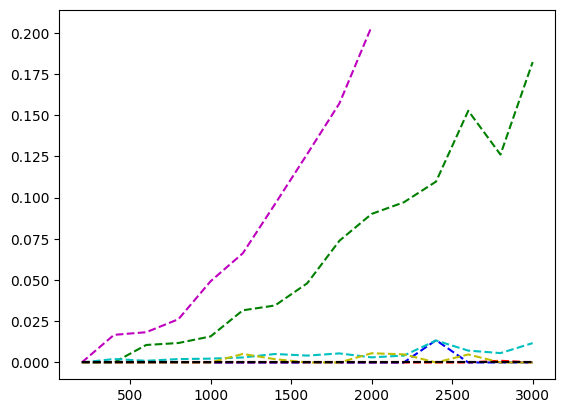

In [31]:
executerTriSorted(bubble_sort,'r','Bubble sort')
executerTriSorted(selection_sort,'g','selection sort')
executerTriSorted(insertion_sort,'b','Insertion sort')
executerTriSorted(heap_sort,'c','heap sort')
executerTriSorted(quick_sort_wrapper, 'm', 'QuickSort', nlist=10, nval=200, surplace=True)
executerTriSorted(merge_sort_top_down, 'y', 'MS top down', nlist=15, nval=200, surplace=False)

executerTriSorted(doubly_optimized_bubble_sort,'r','Doubly O BS')
executerTriSorted(optimized_insertion_sort,'k','Optimized IS')

<b>Explication :</b>

Ici la comparaison est presque similaire à celle sur les meilleurs cas, on a juste changé Quick sort où l'on prenait un tableau aléatoire dans son meilleur cas.

- On observe une grande différence pour Quick sort quand on entre un tableau aléatoire par rapport à un tableau déjà trié. Comme expliqué dans la comparaison précédente, quand on appelle Quick sort sur un tableau trié cela mène à un grand nombre d'appels récursifs sur des sous-tableaux réduits de 1 à chaque fois, alors que quand on l'appelle sur un tableau de nombre aléatoire, le système de pivot est plus efficace et réduit le problème en réel sous-tableaux à chaque appel récursif. => Quick sort perd son sens quand on l'appelle sur un tableau déjà trié.

=> Les meilleurs tris sur les tableaux déjà triés sont bubble sort (et ses optimisations) et  insertion sort (et ses optimisations) pour les mêmes raisons déjà expliquées dans la comparaison des meilleurs cas. Le pire tri à apposer sur un tableau déjà trié est Quick sort et Selection sort (également pour les mêmes raisons expliquées dans les meilleurs des cas).

***


<b><u>Comparaison des cas moyens sur des petits tableaux :</u></b>

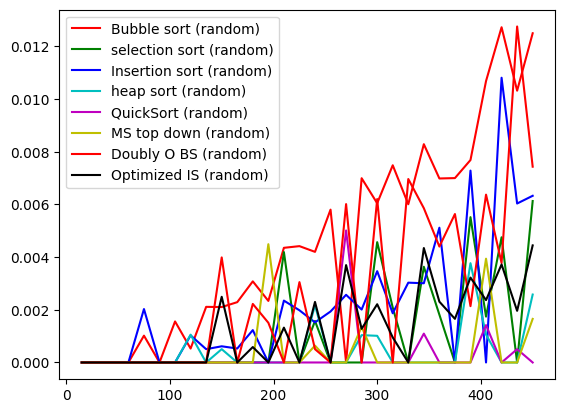

In [18]:
executerTrirandom(bubble_sort,'r','Bubble sort', nlist=30, nval=15, surplace=True)
executerTrirandom(selection_sort,'g','selection sort', nlist=30, nval=15, surplace=True)
executerTrirandom(insertion_sort,'b','Insertion sort', nlist=30, nval=15, surplace=True)
executerTrirandom(heap_sort,'c','heap sort', nlist=30, nval=15, surplace=True)
executerTrirandom(quick_sort_wrapper, 'm', 'QuickSort', nlist=30, nval=15, surplace=True)
executerTrirandom(merge_sort_top_down, 'y', 'MS top down', nlist=30, nval=15, surplace=False)

executerTrirandom(doubly_optimized_bubble_sort,'r','Doubly O BS', nlist=30, nval=15, surplace=True)
executerTrirandom(optimized_insertion_sort, 'k' ,'Optimized IS', nlist=30, nval=15, surplace=True)

<b>Explication :</b>

- On peut voir que sur des petits tableaux (entre 0 et 450 valeurs max), les courbes sont très dispersées et pas très claires. On peut tout de même remarquer que Bubble sort reste un peu près le moins efficace et les trois algorithmes récursifs les meilleurs. Cependant, sur de si petits tableaux, la différence n'est qu'en quelques millisecondes (de 0 à 12) entre les meilleurs et les pires algorithmes, les écarts sont donc réduits sur de petits tableaux.

=> Il y a peu d'écart sur des tableaux réduits

***


<b><u>Comparaison des cas moyens sur de grands tableaux:</u></b>

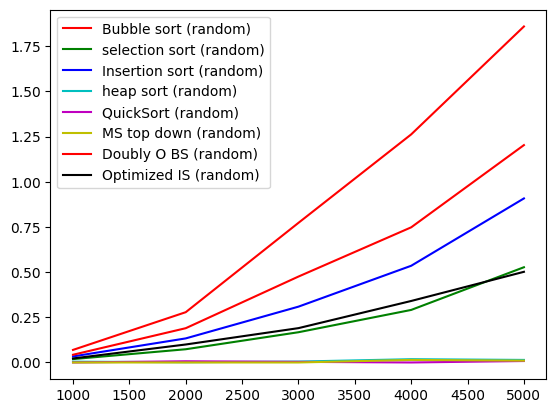

In [33]:
executerTrirandom(bubble_sort,'r','Bubble sort', nlist=5, nval=1000, surplace=True)
executerTrirandom(selection_sort,'g','selection sort', nlist=5, nval=1000, surplace=True)
executerTrirandom(insertion_sort,'b','Insertion sort', nlist=5, nval=1000, surplace=True)
executerTrirandom(heap_sort,'c','heap sort', nlist=5, nval=1000, surplace=True)
executerTrirandom(quick_sort_wrapper, 'm', 'QuickSort', nlist=5, nval=1000, surplace=True)
executerTrirandom(merge_sort_top_down, 'y', 'MS top down', nlist=5, nval=1000, surplace=False)

executerTrirandom(doubly_optimized_bubble_sort,'r','Doubly O BS', nlist=5, nval=1000, surplace=True)
executerTrirandom(optimized_insertion_sort, 'k' ,'Optimized IS', nlist=5, nval=1000, surplace=True)


<b>Explication :</b>

- Ici les courbes sont plus claires. On remarque que plus les tableaux sont grands, plus on a un écart entre les 3 meilleurs (les tris récursifs) et les autres qui suivent une fonction <B>$O(n^2)$</B>. Par exemple, la différence entre les meilleurs et bubble sort pour 5000 valeurs est de 1,75 secondes, ce qui est donc un écart non négligeable dans un tri. Ainsi, pour des tableaux de grandes tailles, il faudra privilégier l'un des trois tris récursifs.

=> Plus les tableaux sont grands, plus les écarts grandissent.

***
***

# 6. Quelques règles de bonnes pratiques


Lorsque les tableaux sont déjà triés, les meilleurs sont bubble sort (et ses optimisations) et insertion sort (et ses optimisations) car ils remarquent rapidement que les tableaux sont déjà triés. Heap sort ainsi que Merge sort ont des performances inférieures mais ont tout de même de bonnes performances dans ce cas. A l'inverse, Quick sort et Sélection sort ont toutes les deux de très mauvaises performances dans ce cas, il faudra donc éviter de les appeler dans ce cas

Lorsque les tableaux sont entrés inversés, c'est merge sort et heap sort qui sont les meilleurs. 

Lorsque  les tableaux entrés sont aléatoires, il faudra privilégier l'un des algorithmes récursifs qui utilise les méthodes diviser pour régner. Pour des données aléatoires, Quick sort est le plus performant des trois, cependant lorsque les données deviennent plus ordonnées, ses performances baissent. Merge sort et heap sort, bien que légèrement moins efficaces que Quick sort, ont une complexité en temps garantie en O(n log(n)). Ainsi, si l'on est sûr d'avoir des données en entrée triées aléatoirement, on choisira Quick sort. Si il y'a de grandes chances qu'il soit trié ou inversé, on choisira merge sort ou heap sort

Ainsi, on peut résumer le choix du tri ainsi :

Tableau trié = bubble sort ou insertion sort
Tableau inversé = merge sort ou heap sort 
Tableau random = quick sort, merge sort ou heap sort

La taille du tableau peut également influer sur le choix de l'algorithme que l'on va choisir. Lorsque l'on a de petits tableaux, on peut choisir n'importe quel algorithme, les performances varient seulement de quelques millisecondes. Cependant, dû aux courbes de complexité <B>$O(n^2)$</B> de certains algorithmes dans leur cas moyen d'utilisation, lorsque l'on a de grands tableaux, la différence entre les performances devient importante. Les 3 algorithmes récursifs deviennent alors encore plus intéressants sur de grands tableaux. Cependant, Quick sort et merge sort ont une complexité en mémoire <B>$O(n)$</B> alors que Heap sort <B>$O(1)$</B>, ainsi si la mémoire est un critère sur les grands tableaux, on choisira heap sort.


On a également pu observer à travers les différentes parties antérieures que pour un algorithme de tri, en général à quelques exceptions près, le meilleur cas sera quand le tableau est déjà trié et le pire quand il est inversé.
De plus, on a pu remarquer que les algorithmes récursifs qui utilisent la méthode diviser pour régner sont plus complexes que les algorithmes itératives, mais cela les rend plus performants. On a également pu voir que ces algorithmes ont en général une complexité spatiale supérieure aux algorithmes itératifs.

Au final, à travers toutes les comparaisons, on a pu conclure que Quick sort est le plus rapide sur les tableaux random mais devient très lent sur les autres cas d'utilisation. Ainsi, si on cherche la stabilité en temps, les meilleurs algorithmes sont Merge sort et Heap sort.

On pourrait améliorer les algorithmes récursifs pour les rendre encore plus performants pour les cas sort et inverted en faisant une vérification du tableau entré avant d'utiliser l'algorithme, à la manière de bubbles sort ou d'insertion sort qui compare une fois les éléments du tableau avant de se rendre compte que le tableau est déjà trié. Cela rendrait les 3 algorithmes récursifs équivalents au meilleur dans le cas des tableaux déjà triés. On pourrait également améliorer Quick sort en trouvant un pivot plus adapté à chaque cas, dans notre version il prend systématiquement le dernier élément.

=> A travers ce projet, on a pu apprendre à anticiper le comportement des algorithmes en temps (et en mémoire) de façon théorique en cherchant la complexité des algorithmes pour leur cas général d'utilisation ainsi que pour des cas particuliers comme le pire ou meilleur cas. Au final, la complexité nous permet de mieux comprendre comment fonctionnent nos algorithmes dans différents cas d'utilisation.


